# Data types and built-in data structures using the example of car data

## Libraries and settings

In [2]:
# Libraries
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set background color of graphics to dark
# plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/sivanujanselvarajah/Documents/zhaw/4.Semester/Scientific programming/scientific_programming/Week_05/exercises


# Import car data

In [3]:
# Read the data
df_orig = pd.read_csv('autoscout24_data.csv', sep=";")

# Show the number of rows and columns
print(df_orig.shape)

# Print the first 10 rows and a selected number of columns
df_orig.iloc[:10,1:12]

(3980, 19)


,Offer_Id,Scrape_Dt,Type,Price,HP,Init_Regist,Mileage,Fuel_Type,Transmission,Dealer_Name,Dealer_PLZ
0,7324420,2020_03_17 07:34:45,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,***confidential***,8488
1,7512768,2020_03_17 07:34:55,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,***confidential***,3186
2,7512034,2020_03_17 07:35:03,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,***confidential***,1262
3,7512728,2020_03_17 07:35:06,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,4314
4,7490242,2020_03_17 07:35:16,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,3250
5,7512188,2020_03_17 07:36:44,MERCEDES-BENZ SLK 200 Kompressor (Cabriolet),CHF 12'000.–,163 PS,12.2004,109'000 km,Benzin,Schaltgetriebe manuell,***confidential***,8832
6,7512184,2020_03_17 07:38:16,MERCEDES-BENZ C 350 Elégance Sport Edition 4Ma...,CHF 8'000.–,272 PS,5.2006,156'000 km,Benzin,Automat,***confidential***,6460
7,7512142,2020_03_17 07:39:00,SEAT Ibiza SC 1.4 TSI Cupra DSG (Kleinwagen),CHF 10'500.–,180 PS,2.201,71'400 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,3014
8,7511265,2020_03_17 07:39:06,PORSCHE 911 Turbo Cabrio PDK (Cabriolet),CHF 143'500.–,521 PS,7.2015,18'000 km,Benzin,Automatisiertes Schaltgetriebe,***confidential***,4133
9,7511230,2020_03_17 07:42:10,VW Golf 1.4 TSI Comfortline (Limousine),CHF 19'800.–,125 PS,12.2015,110'000 km,Benzin,Schaltgetriebe manuell,***confidential***,1807


## Show data types

In [4]:
# Show data types
print(df_orig.dtypes)

Url_Short                  object
Offer_Id                    int64
Scrape_Dt                  object
Type                       object
Price                      object
HP                         object
Init_Regist                object
Mileage                    object
Fuel_Type                  object
Transmission               object
Dealer_Name                object
Dealer_PLZ                  int64
Dealer_City                object
Dealer_Street_House_Nr     object
Dealer_Telnr               object
Init_Regist_MY             object
Init_Regist_Month         float64
Init_Regist_Year          float64
Init_Regist_Dt             object
dtype: object


## Count and remove missing values

In [5]:
# Count missing values
print('Count missing values')
print(df_orig.isna().sum())

# Remove missing values
print('\nCheck whether missing values were successfully removed')
df_clean_01 = df_orig.dropna()
df_clean_01.isna().sum()

Count missing values
Url_Short                 0
Offer_Id                  0
Scrape_Dt                 0
Type                      0
Price                     0
HP                        0
Init_Regist               0
Mileage                   0
Fuel_Type                 0
Transmission              0
Dealer_Name               0
Dealer_PLZ                0
Dealer_City               0
Dealer_Street_House_Nr    2
Dealer_Telnr              0
Init_Regist_MY            0
Init_Regist_Month         7
Init_Regist_Year          7
Init_Regist_Dt            7
dtype: int64

Check whether missing values were successfully removed


Url_Short                 0
Offer_Id                  0
Scrape_Dt                 0
Type                      0
Price                     0
HP                        0
Init_Regist               0
Mileage                   0
Fuel_Type                 0
Transmission              0
Dealer_Name               0
Dealer_PLZ                0
Dealer_City               0
Dealer_Street_House_Nr    0
Dealer_Telnr              0
Init_Regist_MY            0
Init_Regist_Month         0
Init_Regist_Year          0
Init_Regist_Dt            0
dtype: int64

## Count and remove duplicated values

In [6]:
# Count duplicated values
print('Count duplicated values')
print(df_clean_01.duplicated().sum())

# Remove duplicated values
print('\nCheck whether duplicated values were successfully removed')
df = df_clean_01.drop_duplicates()
print(df_clean_01.duplicated().sum())

Count duplicated values
0

Check whether duplicated values were successfully removed
0


## Create additional variables using string-manipulation functions

### Extract make from car type

In [7]:
# Extract the first word from each string
df['Make'] = df['Type'].str.split().str[0]

# Explanation:
# .split() splits a string, e.g.
# txt = 'AUDI A5 Sportback 3.0 TDI quattro S-tronic'
# txt.split()
# ['AUDI', 'A5', 'Sportback', '3.0', 'TDI', 'quattro', 'S-tronic']
# .str[0] returns the 1st item of the list which is 'AUDI'

# Show result
df[['Type', 'Make']]

# Count the number of cars per 'Make'
df['Make'].value_counts()

Make
BMW              546
AUDI             505
MERCEDES-BENZ    491
VW               386
PORSCHE          214
                ... 
TVR                1
DAIMLER            1
VAUXHALL           1
ROLLS-ROYCE        1
ARMSTRONG          1
Name: count, Length: 74, dtype: int64

### Crosstab Make versus Fuel Type

In [8]:
# Makes with highest number of cars
top_ten = list(df['Make'].value_counts().index[:10])

# Create subset of the data
df_sub = df.loc[(df['Make'].isin(top_ten)) &
                (df['Fuel_Type'].isin(['Diesel', 'Benzin']))]

# Cross table
pd.crosstab(df_sub.Make, df_sub.Fuel_Type)

Fuel_Type,Benzin,Diesel
Make,,
AUDI,329,170
BMW,323,210
FIAT,84,9
FORD,78,24
LAND,25,79
MERCEDES-BENZ,320,161
MINI,77,6
PORSCHE,192,21
SKODA,58,56


### Extract numerical values from 'Mileage'

In [9]:
# Extract values using the lambda function in combination with a regular expression
df['Mileage_num'] = df['Mileage'].apply(lambda x: int(re.sub('[^\d]', '', x)))

# Explanation:
# The lambda function iterates over df['Mileage'] in which x is a single element 
# The regular expression '[^\d]' identifies all non numerical characters in x
# The .sub() method replaces the non numerical characters like 'CHF' with ''
# The int() converts the resulting string to an integer

# Show result
df[['Mileage', 'Mileage_num']]

,Mileage,Mileage_num
0,75'000 km,75000
1,46'655 km,46655
2,138'955 km,138955
3,43'000 km,43000
4,43'300 km,43300
...,...,...
3975,78'000 km,78000
3976,315'000 km,315000
3977,85'000 km,85000
3978,188'920 km,188920


### Histogram of Mileage

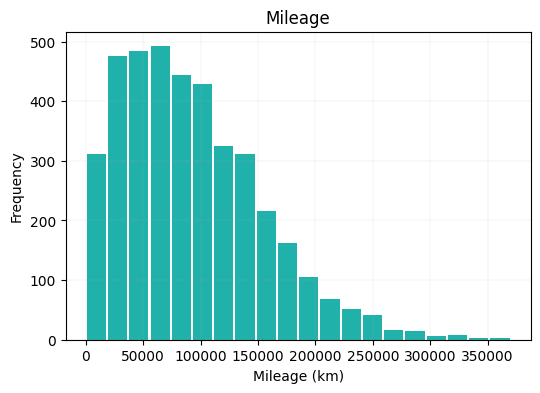

In [10]:
# Histogram
plt.figure(figsize=(6,4))
df['Mileage_num'].plot.hist(grid=True, 
                        bins=20, 
                        rwidth=0.9,
                        color='lightseagreen')
plt.title('Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.grid(linestyle='-', linewidth=0.1)

### Extract numerical values from Horse Power

In [11]:
# Extract values using the lambda function in combination with a regular expression
df['HP_num'] = df['HP'].apply(lambda x: int(re.sub('[^\d]', '', x)))

# Show result
df[['HP', 'HP_num']]

,HP,HP_num
0,245 PS,245
1,184 PS,184
2,306 PS,306
3,360 PS,360
4,252 PS,252
...,...,...
3975,400 PS,400
3976,232 PS,232
3977,525 PS,525
3978,193 PS,193


### Histogram of Horsepower

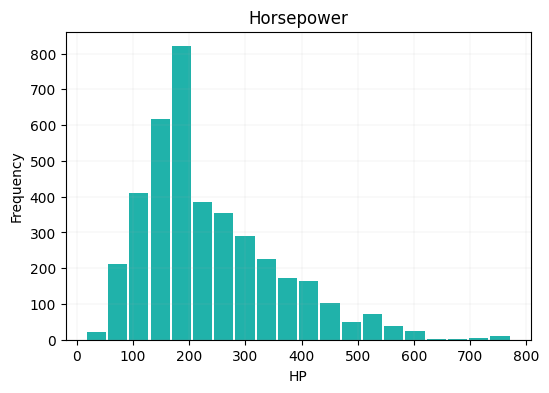

In [12]:
# Histogram
plt.figure(figsize=(6,4))
df['HP_num'].plot.hist(grid=True, 
                        bins=20, 
                        rwidth=0.9,
                        color='lightseagreen')
plt.title('Horsepower')
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.grid(linestyle='-', linewidth=0.1)

### Extract numerical values from Price

In [13]:
# Extract values using the lambda function in combination with a regular expression
df['Price_num'] = df['Price'].apply(lambda x: int(re.sub('[^\d]', '', x)))

# Show result
df[['Price', 'Price_num']]

,Price,Price_num
0,CHF 22'500.–,22500
1,CHF 23'749.–,23749
2,CHF 18'500.–,18500
3,CHF 36'000.–,36000
4,CHF 48'500.–,48500
...,...,...
3975,CHF 58'400.–,58400
3976,CHF 15'900.–,15900
3977,CHF 42'000.–,42000
3978,CHF 9'980.–,9980


### Boxplot of price

<Axes: xlabel='Price_num'>

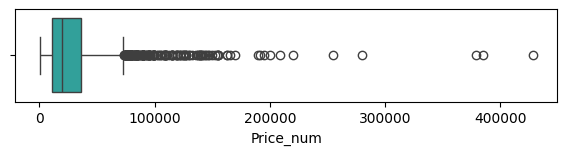

In [14]:
# Boxplot
plt.figure(figsize=(7,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['Price_num'], color="lightseagreen")

## Create additional variables through calculations

### Calculate the Price per Horsepower

In [15]:
# Calculate prices
df['Price_per_HP'] = round(df['Price_num'] / df['HP_num'], 1)

# Show result
df[['Price_num', 'HP_num', 'Price_per_HP']]

,Price_num,HP_num,Price_per_HP
0,22500,245,91.8
1,23749,184,129.1
2,18500,306,60.5
3,36000,360,100.0
4,48500,252,192.5
...,...,...,...
3975,58400,400,146.0
3976,15900,232,68.5
3977,42000,525,80.0
3978,9980,193,51.7


### Boxplot of Price per Horsepower

<Axes: xlabel='Price_per_HP'>

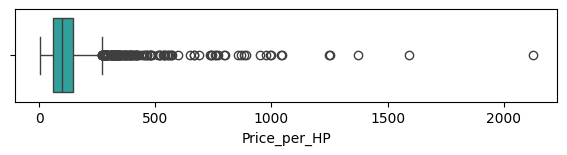

In [16]:
# Boxplot of price per horsepower
plt.figure(figsize=(7,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['Price_per_HP'], color="lightseagreen")

## Show data types of original and new variables

In [17]:
# Show data types (note that an 'object' is a string in pandas)
print(df.dtypes)

Url_Short                  object
Offer_Id                    int64
Scrape_Dt                  object
Type                       object
Price                      object
HP                         object
Init_Regist                object
Mileage                    object
Fuel_Type                  object
Transmission               object
Dealer_Name                object
Dealer_PLZ                  int64
Dealer_City                object
Dealer_Street_House_Nr     object
Dealer_Telnr               object
Init_Regist_MY             object
Init_Regist_Month         float64
Init_Regist_Year          float64
Init_Regist_Dt             object
Make                       object
Mileage_num                 int64
HP_num                      int64
Price_num                   int64
Price_per_HP              float64
dtype: object


## Show summary statistics of numerical variables

In [18]:
# Summary statistics of numeric variables
df.describe()

# Explanation:
# count = number of observations
# mean = mean
# min = minimum
# std = standard deviation
# 25% = 1st quartile
# 50% = median
# 75% = 3rd quartile
# max = maximum


,Offer_Id,Dealer_PLZ,Init_Regist_Month,Init_Regist_Year,Mileage_num,HP_num,Price_num,Price_per_HP
count,3.971000e+03,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,7.242907e+06,5522.633594,6.309494,2010.189121,92952.412491,235.831025,27527.641652,117.362705
std,4.655890e+05,2848.337824,3.386320,9.610067,61097.990134,119.671388,26670.221155,104.818468
min,1.395491e+06,1000.000000,1.000000,1929.000000,1.000000,16.000000,160.000000,1.800000
25%,7.249691e+06,3014.000000,3.000000,2008.000000,45000.000000,150.000000,10900.000000,60.500000
50%,7.408668e+06,6003.000000,6.000000,2013.000000,83500.000000,204.000000,19900.000000,97.900000
75%,7.456806e+06,8304.500000,9.000000,2016.000000,130000.000000,306.000000,35900.000000,144.750000
max,7.512843e+06,9657.000000,12.000000,2020.000000,370000.000000,772.000000,428000.000000,2125.000000


## Use a list to store values from a calulation

In [19]:
# Define a function to calculate the value added tax for a given price
def value_added_tax(price, tax_rate=0.077):
    return price * tax_rate

# Calculate the value added tax using list comprehension
tax_results = [value_added_tax(price) for price in df['Price_num']]

# Show first 10 values of the list
print(tax_results[:10])

# Note that, if you have a data frame, you can also use .apply(), e.g.:
# df['Tax_results'] = df['Price_num'].apply(value_added_tax)
# print(df['Tax_results'])


[1732.5, 1828.673, 1424.5, 2772.0, 3734.5, 924.0, 616.0, 808.5, 11049.5, 1524.6]


## Create a dictionary with all prices per make

In [20]:
# Use set and dictionary comprehension to create a dictionary
car_dict = {make: df.loc[df['Make'] == make, 'Price_num'].tolist() \
            for make in set(df['Make'])}

# Print the resulting dictionary keys and values
print('Dictionary with keys and values:')
print(car_dict)

# Print the resulting dictionary keys
print('\nDictionary keys:')
print(car_dict.keys())

# Print the resulting dictionary values
print('\nDictionary values')
print(car_dict.values())

Dictionary with keys and values:
{'MINI': [26800, 31800, 12200, 24000, 11200, 13500, 24000, 8500, 21500, 11900, 24500, 32000, 32500, 22500, 10350, 7100, 27900, 6900, 17000, 20900, 20200, 24100, 19000, 23900, 11500, 26500, 11900, 31500, 19900, 7200, 18500, 12400, 8500, 7890, 5400, 20000, 17400, 4000, 19300, 37000, 14000, 10500, 9990, 6800, 6750, 7200, 18500, 12000, 5900, 6900, 23900, 10000, 5500, 7000, 4500, 15000, 26900, 6490, 5250, 26200, 25300, 24000, 9500, 3300, 13490, 14900, 19900, 20000, 33000, 9900, 9900, 13900, 24500, 28500, 5200, 21000, 13900, 12900, 3900, 9000, 5400, 33800, 22950], 'DODGE': [40000, 39900, 28500, 4500, 23900, 19900, 43500, 45000, 26900, 59800, 34990, 35000, 15900, 22069, 45000, 8400, 23700, 20000, 26900, 34000], 'HUMMER': [19900, 19000, 12400, 47900, 37500, 40000], 'ARMSTRONG': [15000], 'OPEL': [18500, 19300, 12490, 5000, 12800, 5400, 12999, 1500, 4200, 25900, 37000, 3500, 2500, 2350, 12300, 2999, 6900, 14900, 5500, 15850, 3390, 3850, 12800, 11999, 15900, 6300,

## Access elements of the dictionary with all prices per make

In [21]:
# Define the key
mykey = 'FERRARI'

# Check whether FERRARI is a key in car_dict
if mykey in car_dict:
    print(f'The key {mykey} exists!')

# Get all values from the key
print(f'\nHere are the available prices of the key {mykey}:')
print(car_dict.get(mykey))

The key FERRARI exists!

Here are the available prices of the key FERRARI:
[54900, 54900, 53800, 126900, 125000, 102000, 139500, 79000, 83000, 72000, 75000, 115000, 119000, 95000, 155000, 152000, 140000, 58400]


## Use a set to create a list of unique makes

In [22]:
# Create a set with unique values
unique_makes_set = set(df['Make'])

# Create a list from the set
unique_makes_list = list(unique_makes_set)

# Sort the list
unique_makes_list_sorted = sorted(unique_makes_list)

# Print the result
print(unique_makes_list_sorted)

['AC', 'ALFA', 'ALPINE', 'ARMSTRONG', 'ASTON', 'AUDI', 'AUSTIN-HEALEY', 'BENTLEY', 'BMW', 'BMW-ALPINA', 'BUICK', 'CADILLAC', 'CATERHAM', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DACIA', 'DAEWOO', 'DAIMLER', 'DODGE', 'DS', 'FERRARI', 'FIAT', 'FISKER', 'FORD', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LANCIA', 'LAND', 'LEXUS', 'LINCOLN', 'LOTUS', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MG', 'MINI', 'MITSUBISHI', 'MORGAN', 'McLAREN', 'NISSAN', 'OPEL', 'PEUGEOT', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'RENAULT', 'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SEAT', 'SKODA', 'SMART', 'SSANGYONG', 'STEYR', 'SUBARU', 'SUZUKI', 'TAZZARI', 'TESLA', 'TOYOTA', 'TRIUMPH', 'TVR', 'VAUXHALL', 'VOLVO', 'VW', 'WILLYS']


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [23]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-03-26 16:53:23
Python Version: 3.10.13
-----------------------------------
